In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
series = np.sin((0.1*np.arange(400))**2)

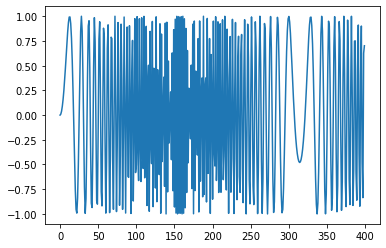

In [25]:
plt.plot(series)
plt.show()

In [26]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (390, 10) Y.shape (390,)


# AutoRegressive linear model

In [27]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss = "mse", optimizer = Adam(lr = 0.01))

history = model.fit(X[:-N//2],Y[:-N//2],epochs = 80, validation_data = (X[-N//2:],Y[-N//2:]))

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 0s 1ms/sample - loss: 1.2933 - val_loss: 1.4376
Epoch 2/80
195/195 [==============================] - 0s 92us/sample - loss: 1.0896 - val_loss: 1.2630
Epoch 3/80
195/195 [==============================] - 0s 97us/sample - loss: 0.9406 - val_loss: 1.1206
Epoch 4/80
195/195 [==============================] - 0s 82us/sample - loss: 0.8294 - val_loss: 0.9854
Epoch 5/80
195/195 [==============================] - 0s 92us/sample - loss: 0.7361 - val_loss: 0.8848
Epoch 6/80
195/195 [==============================] - 0s 103us/sample - loss: 0.6683 - val_loss: 0.8207
Epoch 7/80
195/195 [==============================] - 0s 118us/sample - loss: 0.6230 - val_loss: 0.7645
Epoch 8/80
195/195 [==============================] - 0s 97us/sample - loss: 0.5877 - val_loss: 0.7221
Epoch 9/80
195/195 [==============================] - 0s 102us/sample - loss: 0.5646 - val_loss: 0.6892
Epoch 10/80
195/195 [====

Epoch 79/80
195/195 [==============================] - 0s 67us/sample - loss: 0.4866 - val_loss: 0.5805
Epoch 80/80
195/195 [==============================] - 0s 72us/sample - loss: 0.4893 - val_loss: 0.5757


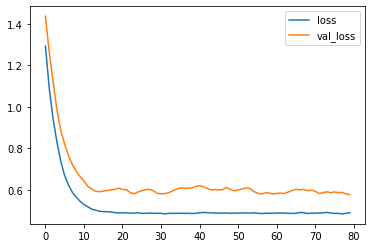

In [28]:
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()

(390, 1)


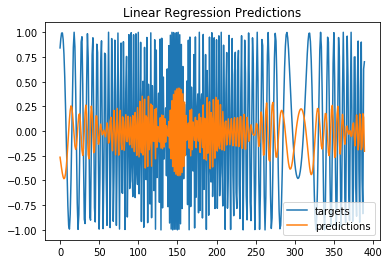

In [29]:
#one step forecast
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label = "targets")
plt.plot(predictions, label = "predictions")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

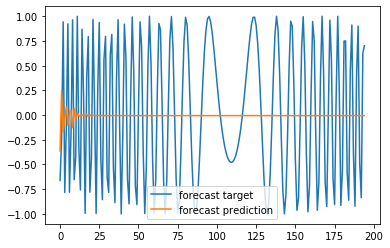

In [33]:
#Multi step forecast
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    i+=1
    
    validation_predictions.append(p)
    last_x = np.roll(last_x,-1)
    last_x[-1] = p
    
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = "forecast prediction")
plt.legend()
plt.show()

# SIMPLE RNN

In [75]:
X = X.reshape(-1,T,1)
i = Input(shape=(T,D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss = "mse", optimizer = Adam(lr = 0.05))

history = model.fit(X[:-N//2],Y[:-N//2], batch_size = 32,epochs = 200, validation_data = (X[-N//2:],Y[-N//2:]))

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 2s 12ms/sample - loss: 0.5706 - val_loss: 0.9048
Epoch 2/200
195/195 [==============================] - 0s 174us/sample - loss: 0.5788 - val_loss: 0.5951
Epoch 3/200
195/195 [==============================] - 0s 174us/sample - loss: 0.4946 - val_loss: 0.5567
Epoch 4/200
195/195 [==============================] - 0s 179us/sample - loss: 0.4756 - val_loss: 0.5106
Epoch 5/200
195/195 [==============================] - 0s 169us/sample - loss: 0.3771 - val_loss: 0.5595
Epoch 6/200
195/195 [==============================] - 0s 185us/sample - loss: 0.3394 - val_loss: 0.4665
Epoch 7/200
195/195 [==============================] - 0s 200us/sample - loss: 0.3061 - val_loss: 0.3459
Epoch 8/200
195/195 [==============================] - 0s 185us/sample - loss: 0.1769 - val_loss: 0.2699
Epoch 9/200
195/195 [==============================] - 0s 169us/sample - loss: 0.1479 - val_loss: 0.2242
Epoch 10/2

Epoch 78/200
195/195 [==============================] - 0s 159us/sample - loss: 0.0264 - val_loss: 0.0696
Epoch 79/200
195/195 [==============================] - 0s 159us/sample - loss: 0.0170 - val_loss: 0.0704
Epoch 80/200
195/195 [==============================] - 0s 169us/sample - loss: 0.0190 - val_loss: 0.0539
Epoch 81/200
195/195 [==============================] - 0s 174us/sample - loss: 0.0157 - val_loss: 0.0796
Epoch 82/200
195/195 [==============================] - 0s 174us/sample - loss: 0.0141 - val_loss: 0.0691
Epoch 83/200
195/195 [==============================] - 0s 164us/sample - loss: 0.0199 - val_loss: 0.0630
Epoch 84/200
195/195 [==============================] - 0s 164us/sample - loss: 0.0219 - val_loss: 0.0607
Epoch 85/200
195/195 [==============================] - 0s 164us/sample - loss: 0.0212 - val_loss: 0.0678
Epoch 86/200
195/195 [==============================] - 0s 169us/sample - loss: 0.0189 - val_loss: 0.0931
Epoch 87/200
195/195 [========================

Epoch 155/200
195/195 [==============================] - 0s 169us/sample - loss: 0.0313 - val_loss: 0.0746
Epoch 156/200
195/195 [==============================] - 0s 169us/sample - loss: 0.0198 - val_loss: 0.0804
Epoch 157/200
195/195 [==============================] - 0s 174us/sample - loss: 0.0153 - val_loss: 0.0568
Epoch 158/200
195/195 [==============================] - 0s 174us/sample - loss: 0.0117 - val_loss: 0.0370
Epoch 159/200
195/195 [==============================] - 0s 159us/sample - loss: 0.0142 - val_loss: 0.0483
Epoch 160/200
195/195 [==============================] - 0s 179us/sample - loss: 0.0144 - val_loss: 0.0647
Epoch 161/200
195/195 [==============================] - 0s 174us/sample - loss: 0.0155 - val_loss: 0.0557
Epoch 162/200
195/195 [==============================] - 0s 169us/sample - loss: 0.0147 - val_loss: 0.0494
Epoch 163/200
195/195 [==============================] - 0s 169us/sample - loss: 0.0141 - val_loss: 0.0523
Epoch 164/200
195/195 [==============

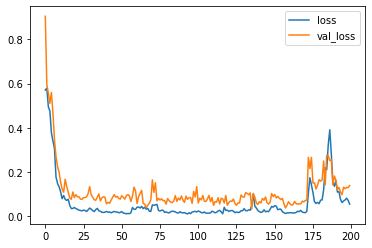

In [76]:
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()

(390, 1)


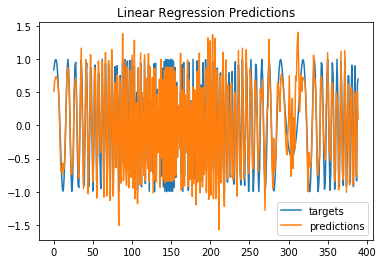

In [77]:
#one step forecast
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label = "targets")
plt.plot(predictions, label = "predictions")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

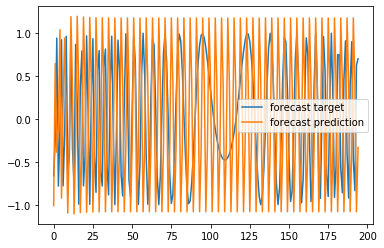

In [78]:
#Multi step forecast
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,T,1))[0,0]
    i+=1
    
    validation_predictions.append(p)
    last_x = np.roll(last_x,-1)
    last_x[-1] = p
    
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = "forecast prediction")
plt.legend()
plt.show()

# LSTM

In [59]:
X = X.reshape(-1,T,1)
i = Input(shape=(T,D))
x = LSTM(10)(i)

x = Dense(1)(x)
model = Model(i,x)
model.compile(loss = "mse", optimizer = Adam(lr = 0.02))

history = model.fit(X[:-N//2],Y[:-N//2], batch_size = 32,epochs = 200, validation_data = (X[-N//2:],Y[-N//2:]))

Train on 195 samples, validate on 195 samples
Epoch 1/1000
195/195 [==============================] - 3s 16ms/sample - loss: 0.5385 - val_loss: 0.4608
Epoch 2/1000
195/195 [==============================] - 0s 554us/sample - loss: 0.5358 - val_loss: 0.4683
Epoch 3/1000
195/195 [==============================] - 0s 538us/sample - loss: 0.5280 - val_loss: 0.4654
Epoch 4/1000
195/195 [==============================] - 0s 574us/sample - loss: 0.5195 - val_loss: 0.4642
Epoch 5/1000
195/195 [==============================] - 0s 595us/sample - loss: 0.5010 - val_loss: 0.4685
Epoch 6/1000
195/195 [==============================] - 0s 600us/sample - loss: 0.4927 - val_loss: 0.4914
Epoch 7/1000
195/195 [==============================] - 0s 595us/sample - loss: 0.4116 - val_loss: 0.5013
Epoch 8/1000
195/195 [==============================] - 0s 595us/sample - loss: 0.3239 - val_loss: 0.5514
Epoch 9/1000
195/195 [==============================] - 0s 528us/sample - loss: 0.2820 - val_loss: 0.6620
E

195/195 [==============================] - 0s 666us/sample - loss: 0.0056 - val_loss: 0.1230
Epoch 78/1000
195/195 [==============================] - 0s 564us/sample - loss: 0.0038 - val_loss: 0.1228
Epoch 79/1000
195/195 [==============================] - 0s 562us/sample - loss: 0.0032 - val_loss: 0.1033
Epoch 80/1000
195/195 [==============================] - 0s 543us/sample - loss: 0.0023 - val_loss: 0.1267
Epoch 81/1000
195/195 [==============================] - 0s 554us/sample - loss: 0.0026 - val_loss: 0.1004
Epoch 82/1000
195/195 [==============================] - 0s 557us/sample - loss: 0.0026 - val_loss: 0.1175
Epoch 83/1000
195/195 [==============================] - 0s 557us/sample - loss: 0.0020 - val_loss: 0.1146
Epoch 84/1000
195/195 [==============================] - 0s 559us/sample - loss: 0.0018 - val_loss: 0.1134
Epoch 85/1000
195/195 [==============================] - 0s 528us/sample - loss: 0.0018 - val_loss: 0.1104
Epoch 86/1000
195/195 [============================

195/195 [==============================] - 0s 552us/sample - loss: 0.0018 - val_loss: 0.1037
Epoch 154/1000
195/195 [==============================] - 0s 548us/sample - loss: 0.0013 - val_loss: 0.1070
Epoch 155/1000
195/195 [==============================] - 0s 702us/sample - loss: 0.0017 - val_loss: 0.1074
Epoch 156/1000
195/195 [==============================] - 0s 723us/sample - loss: 0.0021 - val_loss: 0.1110
Epoch 157/1000
195/195 [==============================] - 0s 551us/sample - loss: 0.0020 - val_loss: 0.0979
Epoch 158/1000
195/195 [==============================] - 0s 774us/sample - loss: 0.0016 - val_loss: 0.1146
Epoch 159/1000
195/195 [==============================] - 0s 697us/sample - loss: 0.0014 - val_loss: 0.0970
Epoch 160/1000
195/195 [==============================] - 0s 639us/sample - loss: 0.0027 - val_loss: 0.1053
Epoch 161/1000
195/195 [==============================] - 0s 743us/sample - loss: 0.0028 - val_loss: 0.1094
Epoch 162/1000
195/195 [===================

Epoch 228/1000
195/195 [==============================] - 0s 579us/sample - loss: 0.0019 - val_loss: 0.0985
Epoch 229/1000
195/195 [==============================] - 0s 856us/sample - loss: 0.0031 - val_loss: 0.0856
Epoch 230/1000
195/195 [==============================] - 0s 759us/sample - loss: 0.0021 - val_loss: 0.0776
Epoch 231/1000
195/195 [==============================] - 0s 603us/sample - loss: 0.0016 - val_loss: 0.0884
Epoch 232/1000
195/195 [==============================] - 0s 533us/sample - loss: 0.0012 - val_loss: 0.0869
Epoch 233/1000
195/195 [==============================] - 0s 557us/sample - loss: 7.5131e-04 - val_loss: 0.0837
Epoch 234/1000
195/195 [==============================] - 0s 542us/sample - loss: 0.0016 - val_loss: 0.0845
Epoch 235/1000
195/195 [==============================] - 0s 554us/sample - loss: 0.0011 - val_loss: 0.0915
Epoch 236/1000
195/195 [==============================] - 0s 569us/sample - loss: 8.2727e-04 - val_loss: 0.0839
Epoch 237/1000
195/1

Epoch 302/1000
195/195 [==============================] - 0s 564us/sample - loss: 0.0012 - val_loss: 0.0690
Epoch 303/1000
195/195 [==============================] - 0s 523us/sample - loss: 0.0016 - val_loss: 0.0912
Epoch 304/1000
195/195 [==============================] - 0s 541us/sample - loss: 0.0015 - val_loss: 0.0754
Epoch 305/1000
195/195 [==============================] - 0s 540us/sample - loss: 0.0018 - val_loss: 0.0933
Epoch 306/1000
195/195 [==============================] - 0s 559us/sample - loss: 0.0014 - val_loss: 0.0696
Epoch 307/1000
195/195 [==============================] - 0s 548us/sample - loss: 0.0015 - val_loss: 0.1058
Epoch 308/1000
195/195 [==============================] - 0s 584us/sample - loss: 0.0020 - val_loss: 0.0752
Epoch 309/1000
195/195 [==============================] - 0s 589us/sample - loss: 0.0023 - val_loss: 0.0988
Epoch 310/1000
195/195 [==============================] - 0s 544us/sample - loss: 0.0049 - val_loss: 0.0737
Epoch 311/1000
195/195 [====

195/195 [==============================] - 0s 559us/sample - loss: 0.0011 - val_loss: 0.0642
Epoch 377/1000
195/195 [==============================] - 0s 579us/sample - loss: 0.0017 - val_loss: 0.0823
Epoch 378/1000
195/195 [==============================] - 0s 530us/sample - loss: 7.3652e-04 - val_loss: 0.0773
Epoch 379/1000
195/195 [==============================] - 0s 547us/sample - loss: 7.5004e-04 - val_loss: 0.0799
Epoch 380/1000
195/195 [==============================] - 0s 502us/sample - loss: 5.7148e-04 - val_loss: 0.0713
Epoch 381/1000
195/195 [==============================] - 0s 551us/sample - loss: 9.9429e-04 - val_loss: 0.0843
Epoch 382/1000
195/195 [==============================] - 0s 579us/sample - loss: 7.4897e-04 - val_loss: 0.0686
Epoch 383/1000
195/195 [==============================] - 0s 528us/sample - loss: 0.0014 - val_loss: 0.0723
Epoch 384/1000
195/195 [==============================] - 0s 554us/sample - loss: 0.0013 - val_loss: 0.0862
Epoch 385/1000
195/195 

195/195 [==============================] - 0s 589us/sample - loss: 0.0016 - val_loss: 0.0722
Epoch 451/1000
195/195 [==============================] - 0s 520us/sample - loss: 0.0012 - val_loss: 0.0731
Epoch 452/1000
195/195 [==============================] - 0s 507us/sample - loss: 0.0045 - val_loss: 0.0754
Epoch 453/1000
195/195 [==============================] - 0s 512us/sample - loss: 0.0095 - val_loss: 0.0715
Epoch 454/1000
195/195 [==============================] - 0s 518us/sample - loss: 0.0046 - val_loss: 0.0746
Epoch 455/1000
195/195 [==============================] - 0s 554us/sample - loss: 0.0064 - val_loss: 0.0721
Epoch 456/1000
195/195 [==============================] - 0s 518us/sample - loss: 0.0069 - val_loss: 0.0838
Epoch 457/1000
195/195 [==============================] - 0s 507us/sample - loss: 0.0049 - val_loss: 0.0590
Epoch 458/1000
195/195 [==============================] - 0s 554us/sample - loss: 0.0036 - val_loss: 0.0801
Epoch 459/1000
195/195 [===================

195/195 [==============================] - 0s 646us/sample - loss: 2.3903e-04 - val_loss: 0.0653
Epoch 526/1000
195/195 [==============================] - 0s 630us/sample - loss: 3.1753e-04 - val_loss: 0.0626
Epoch 527/1000
195/195 [==============================] - 0s 651us/sample - loss: 3.5119e-04 - val_loss: 0.0623
Epoch 528/1000
195/195 [==============================] - 0s 620us/sample - loss: 2.4878e-04 - val_loss: 0.0648
Epoch 529/1000
195/195 [==============================] - 0s 620us/sample - loss: 2.0110e-04 - val_loss: 0.0614
Epoch 530/1000
195/195 [==============================] - 0s 641us/sample - loss: 2.7471e-04 - val_loss: 0.0630
Epoch 531/1000
195/195 [==============================] - 0s 641us/sample - loss: 2.5420e-04 - val_loss: 0.0629
Epoch 532/1000
195/195 [==============================] - 0s 630us/sample - loss: 2.6354e-04 - val_loss: 0.0635
Epoch 533/1000
195/195 [==============================] - 0s 651us/sample - loss: 2.4697e-04 - val_loss: 0.0611
Epoch 5

195/195 [==============================] - 0s 548us/sample - loss: 5.4069e-04 - val_loss: 0.0621
Epoch 599/1000
195/195 [==============================] - 0s 496us/sample - loss: 3.1493e-04 - val_loss: 0.0621
Epoch 600/1000
195/195 [==============================] - 0s 507us/sample - loss: 2.5651e-04 - val_loss: 0.0630
Epoch 601/1000
195/195 [==============================] - 0s 482us/sample - loss: 2.4748e-04 - val_loss: 0.0578
Epoch 602/1000
195/195 [==============================] - 0s 543us/sample - loss: 4.2156e-04 - val_loss: 0.0583
Epoch 603/1000
195/195 [==============================] - 0s 564us/sample - loss: 3.5580e-04 - val_loss: 0.0643
Epoch 604/1000
195/195 [==============================] - 0s 555us/sample - loss: 3.2648e-04 - val_loss: 0.0584
Epoch 605/1000
195/195 [==============================] - 0s 502us/sample - loss: 2.4873e-04 - val_loss: 0.0581
Epoch 606/1000
195/195 [==============================] - 0s 504us/sample - loss: 1.9733e-04 - val_loss: 0.0607
Epoch 6

195/195 [==============================] - 0s 579us/sample - loss: 0.0018 - val_loss: 0.0630
Epoch 673/1000
195/195 [==============================] - 0s 513us/sample - loss: 0.0015 - val_loss: 0.0626
Epoch 674/1000
195/195 [==============================] - 0s 492us/sample - loss: 0.0016 - val_loss: 0.0665
Epoch 675/1000
195/195 [==============================] - 0s 533us/sample - loss: 0.0011 - val_loss: 0.0519
Epoch 676/1000
195/195 [==============================] - 0s 523us/sample - loss: 0.0015 - val_loss: 0.0717
Epoch 677/1000
195/195 [==============================] - 0s 507us/sample - loss: 0.0019 - val_loss: 0.0522
Epoch 678/1000
195/195 [==============================] - 0s 574us/sample - loss: 0.0027 - val_loss: 0.0667
Epoch 679/1000
195/195 [==============================] - 0s 568us/sample - loss: 0.0028 - val_loss: 0.0575
Epoch 680/1000
195/195 [==============================] - 0s 501us/sample - loss: 0.0044 - val_loss: 0.0570
Epoch 681/1000
195/195 [===================

195/195 [==============================] - 0s 533us/sample - loss: 3.6068e-04 - val_loss: 0.0568
Epoch 747/1000
195/195 [==============================] - 0s 528us/sample - loss: 2.8205e-04 - val_loss: 0.0568
Epoch 748/1000
195/195 [==============================] - 0s 507us/sample - loss: 2.0781e-04 - val_loss: 0.0579
Epoch 749/1000
195/195 [==============================] - 0s 515us/sample - loss: 2.0319e-04 - val_loss: 0.0548
Epoch 750/1000
195/195 [==============================] - 0s 528us/sample - loss: 2.3688e-04 - val_loss: 0.0583
Epoch 751/1000
195/195 [==============================] - 0s 513us/sample - loss: 5.0431e-04 - val_loss: 0.0525
Epoch 752/1000
195/195 [==============================] - 0s 523us/sample - loss: 5.8844e-04 - val_loss: 0.0610
Epoch 753/1000
195/195 [==============================] - 0s 502us/sample - loss: 6.4855e-04 - val_loss: 0.0558
Epoch 754/1000
195/195 [==============================] - 0s 507us/sample - loss: 4.8196e-04 - val_loss: 0.0549
Epoch 7

Epoch 821/1000
195/195 [==============================] - 0s 507us/sample - loss: 0.0018 - val_loss: 0.0444
Epoch 822/1000
195/195 [==============================] - 0s 513us/sample - loss: 0.0012 - val_loss: 0.0444
Epoch 823/1000
195/195 [==============================] - 0s 523us/sample - loss: 0.0014 - val_loss: 0.0422
Epoch 824/1000
195/195 [==============================] - 0s 497us/sample - loss: 9.9170e-04 - val_loss: 0.0392
Epoch 825/1000
195/195 [==============================] - 0s 523us/sample - loss: 7.7597e-04 - val_loss: 0.0437
Epoch 826/1000
195/195 [==============================] - 0s 487us/sample - loss: 7.8233e-04 - val_loss: 0.0410
Epoch 827/1000
195/195 [==============================] - 0s 513us/sample - loss: 9.6270e-04 - val_loss: 0.0400
Epoch 828/1000
195/195 [==============================] - 0s 503us/sample - loss: 0.0017 - val_loss: 0.0503
Epoch 829/1000
195/195 [==============================] - 0s 518us/sample - loss: 0.0019 - val_loss: 0.0373
Epoch 830/10

195/195 [==============================] - 0s 569us/sample - loss: 7.1531e-04 - val_loss: 0.0356
Epoch 895/1000
195/195 [==============================] - 0s 510us/sample - loss: 4.5345e-04 - val_loss: 0.0420
Epoch 896/1000
195/195 [==============================] - 0s 502us/sample - loss: 3.8525e-04 - val_loss: 0.0390
Epoch 897/1000
195/195 [==============================] - 0s 494us/sample - loss: 5.0720e-04 - val_loss: 0.0362
Epoch 898/1000
195/195 [==============================] - 0s 533us/sample - loss: 7.9956e-04 - val_loss: 0.0443
Epoch 899/1000
195/195 [==============================] - 0s 528us/sample - loss: 5.5804e-04 - val_loss: 0.0346
Epoch 900/1000
195/195 [==============================] - 0s 507us/sample - loss: 4.6211e-04 - val_loss: 0.0443
Epoch 901/1000
195/195 [==============================] - 0s 507us/sample - loss: 4.6519e-04 - val_loss: 0.0374
Epoch 902/1000
195/195 [==============================] - 0s 508us/sample - loss: 4.8231e-04 - val_loss: 0.0432
Epoch 9

195/195 [==============================] - 0s 513us/sample - loss: 4.5808e-04 - val_loss: 0.0484
Epoch 969/1000
195/195 [==============================] - 0s 523us/sample - loss: 2.8737e-04 - val_loss: 0.0492
Epoch 970/1000
195/195 [==============================] - 0s 523us/sample - loss: 2.4932e-04 - val_loss: 0.0482
Epoch 971/1000
195/195 [==============================] - 0s 519us/sample - loss: 4.1615e-04 - val_loss: 0.0459
Epoch 972/1000
195/195 [==============================] - 0s 518us/sample - loss: 3.9284e-04 - val_loss: 0.0518
Epoch 973/1000
195/195 [==============================] - 0s 502us/sample - loss: 4.2648e-04 - val_loss: 0.0469
Epoch 974/1000
195/195 [==============================] - 0s 507us/sample - loss: 3.4933e-04 - val_loss: 0.0505
Epoch 975/1000
195/195 [==============================] - 0s 538us/sample - loss: 5.2312e-04 - val_loss: 0.0463
Epoch 976/1000
195/195 [==============================] - 0s 502us/sample - loss: 4.6221e-04 - val_loss: 0.0482
Epoch 9

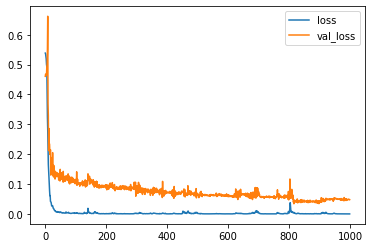

In [60]:
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()

(390, 1)


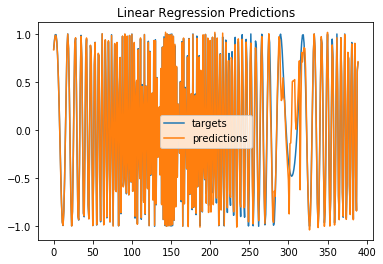

In [61]:
#one step forecast
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label = "targets")
plt.plot(predictions, label = "predictions")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

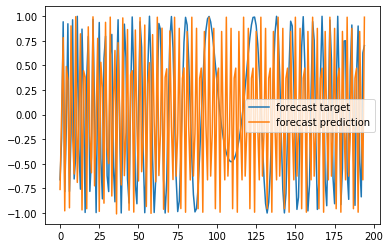

In [62]:
#Multi step forecast
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,T,1))[0,0]
    i+=1
    
    validation_predictions.append(p)
    last_x = np.roll(last_x,-1)
    last_x[-1] = p
    
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = "forecast prediction")
plt.legend()
plt.show()